# Process data for LED display

Scales and adjusts LED intensity values and converts to 'uint8'

In [1]:
import os
import csv
import datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
image_dir = 'images'
data_dir = 'data'

label = 'seq_data'

In [3]:
#dt_string = datetime.datetime.now().strftime('%Y-%m-%d %H:%M')
filename = f'{label}_ids.csv'
with open(os.path.join(data_dir, filename), 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    lines = [line for line in csv_reader]

print("sequence data on file:")
sequences = []
for  line in lines:
    print(f"{line[0]}: {line[1]}")
    sequences.append(line[1])

sequence data on file:
2022-01-01 22:16: 7
2022-01-01 22:16: 7
2022-01-01 22:17: 1
2022-01-01 22:25: 2
2022-01-01 22:31: 3
2022-01-01 22:37: 4
2022-01-01 22:43: 5
2022-01-01 23:52: 6
2022-01-02 00:00: 7
2022-01-02 00:03: 8
2022-01-02 00:05: 9
2022-01-02 00:07: 10
2022-01-02 00:10: 11
2022-01-02 00:12: 12
2022-01-02 00:15: 13
2022-01-02 00:19: 14
2022-01-02 00:21: 15
2022-01-02 00:24: 16
2022-01-02 00:26: 17
2022-01-02 00:30: 18
2022-01-02 00:33: 19
2022-01-02 00:35: 20
2022-01-02 00:37: 21
2022-01-02 00:40: 22
2022-01-02 00:43: 23
2022-01-02 00:47: 24
2022-01-02 00:49: 25
2022-01-02 00:51: 26
2022-01-02 00:55: 27
2022-01-02 00:58: 28
2022-01-02 01:00: 29
2022-01-02 01:04: 30
2022-01-02 01:06: 31
2022-01-02 01:09: 32
2022-01-02 01:11: 33
2022-01-02 01:14: 34
2022-01-02 01:16: 35
2022-01-02 01:19: 36
2022-01-02 01:22: 37
2022-01-02 01:25: 38
2022-01-02 01:28: 39
2022-01-02 01:33: 40
2022-01-02 01:35: 41
2022-01-02 01:37: 42
2022-01-02 01:39: 43
2022-01-02 01:41: 44
2022-01-02 01:44: 45
2

In [4]:
selected_seqs = list(range(1, 51))

In [5]:
rgb_data = []
for c in range(3):
    filename = f'{label}_rgb_{c}.csv'
    with open(os.path.join(data_dir, filename), 'r') as f:
        x = np.loadtxt(f, delimiter=',')
    rgb_data.append(x)
assert(all(len(data) == len(sequences) for data in rgb_data))

In [6]:
# Adjustment parameters

adj_params = {
    'mul': [96, 96, 48],
    'power': [1, 1, 1],
    'div': [1, 1, 1],
    'v_min': [0, 0, 0],
    'v_max': [96, 96, 48]
}

rgb_data_adj = []
for c in range(3):
    mul = adj_params['mul'][c]
    div = adj_params['div'][c]
    power = adj_params['power'][c]
    v_min = adj_params['v_min'][c]
    v_max = adj_params['v_max'][c]
    x_data = []
    for seq in selected_seqs:
        x = np.clip(rgb_data[c][seq] * mul ** power / div, 
                    v_min, v_max)
        x = x.astype('uint8')
        x_data.append(x)
    rgb_data_adj.append(x_data)

len(rgb_data_adj)

3

## Find similar points in sequence

In [7]:
np.array(rgb_data_adj).shape

(3, 50, 86)

In [8]:
x = np.arange(3*5*4).reshape((3, 5, 4))
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]],

       [[40, 41, 42, 43],
        [44, 45, 46, 47],
        [48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59]]])

In [9]:
x.swapaxes(0, 1)

array([[[ 0,  1,  2,  3],
        [20, 21, 22, 23],
        [40, 41, 42, 43]],

       [[ 4,  5,  6,  7],
        [24, 25, 26, 27],
        [44, 45, 46, 47]],

       [[ 8,  9, 10, 11],
        [28, 29, 30, 31],
        [48, 49, 50, 51]],

       [[12, 13, 14, 15],
        [32, 33, 34, 35],
        [52, 53, 54, 55]],

       [[16, 17, 18, 19],
        [36, 37, 38, 39],
        [56, 57, 58, 59]]])

In [10]:
x.swapaxes(0, 1).reshape(5, -1)

array([[ 0,  1,  2,  3, 20, 21, 22, 23, 40, 41, 42, 43],
       [ 4,  5,  6,  7, 24, 25, 26, 27, 44, 45, 46, 47],
       [ 8,  9, 10, 11, 28, 29, 30, 31, 48, 49, 50, 51],
       [12, 13, 14, 15, 32, 33, 34, 35, 52, 53, 54, 55],
       [16, 17, 18, 19, 36, 37, 38, 39, 56, 57, 58, 59]])

In [11]:
# Compare pairs of values

seq_data = np.array(rgb_data_adj).swapaxes(0, 1).reshape(50, -1)
seq_data.shape

(50, 258)

In [12]:
assert(np.array_equal(
    seq_data[0, :],
    np.array(rgb_data_adj)[:, 0, :].flatten()
))

In [13]:
# Compute similarity between two sets of values
def calc_differences(seq_data, i, j):
    return ((seq_data[i, :] - seq_data[j, :]) ** 2).mean(axis=-1)

calc_differences(seq_data, 1, 20)

36.31782945736434

In [14]:
ii, jj = np.indices([50, 50])

In [15]:
calc_differences(seq_data, ii, jj).shape

(50, 50)

In [16]:
np.array_equal(
    calc_differences(seq_data, ii, jj),
    ((seq_data[ii, :] - seq_data[jj, :]) ** 2).mean(axis=-1)
)

True

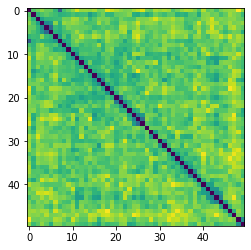

In [17]:
plt.imshow(calc_differences(seq_data, ii, jj))
plt.show()

In [72]:
diff_sorted = np.stack([calc_differences(seq_data, ii, jj), ii, jj], axis=2)
diff_sorted = diff_sorted.reshape(50*50, -1)
diff_sorted = diff_sorted[diff_sorted[:, 0].argsort(), :]
diff_sorted = diff_sorted.round(2)
# Drop self-comparisons
diff_sorted = diff_sorted[50:, :]
diff_sorted

array([[14.15,  7.  ,  0.  ],
       [14.15,  0.  ,  7.  ],
       [16.42,  5.  ,  4.  ],
       ...,
       [47.56, 18.  , 46.  ],
       [48.09,  0.  , 48.  ],
       [48.09, 48.  ,  0.  ]])

In [81]:
# Find biggest distance between matches
d = diff_sorted[:150]
np.hstack([d, np.abs(d[:, 2] - d[:, 1]).reshape(-1, 1)])

array([[14.15,  7.  ,  0.  ,  7.  ],
       [14.15,  0.  ,  7.  ,  7.  ],
       [16.42,  5.  ,  4.  ,  1.  ],
       [16.42,  4.  ,  5.  ,  1.  ],
       [17.03, 25.  , 26.  ,  1.  ],
       [17.03, 26.  , 25.  ,  1.  ],
       [20.05, 20.  , 21.  ,  1.  ],
       [20.05, 21.  , 20.  ,  1.  ],
       [21.16, 25.  , 24.  ,  1.  ],
       [21.16, 24.  , 25.  ,  1.  ],
       [21.71, 43.  , 44.  ,  1.  ],
       [21.71, 44.  , 43.  ,  1.  ],
       [22.62, 37.  , 38.  ,  1.  ],
       [22.62, 38.  , 37.  ,  1.  ],
       [22.63, 43.  , 42.  ,  1.  ],
       [22.63, 42.  , 43.  ,  1.  ],
       [22.8 ,  4.  ,  3.  ,  1.  ],
       [22.8 ,  3.  ,  4.  ,  1.  ],
       [23.26, 16.  , 17.  ,  1.  ],
       [23.26, 17.  , 16.  ,  1.  ],
       [23.61, 48.  , 49.  ,  1.  ],
       [23.61, 49.  , 48.  ,  1.  ],
       [24.9 , 21.  , 22.  ,  1.  ],
       [24.9 , 22.  , 21.  ,  1.  ],
       [25.26, 11.  , 10.  ,  1.  ],
       [25.26, 10.  , 11.  ,  1.  ],
       [25.3 , 41.  , 43.  ,  2.  ],
 

## Print output

In [83]:
# Print output for insertion into fire_data.h file
selected_seqs = range(1, 40)

# Calculate frame interval
print(f"Frame interval: {1000 / 25}")

for c in range(3):
    items = []
    print(f"\n// Data for {['R', 'G', 'B'][c]}\n")
    for seq, _ in enumerate(selected_seqs):
        data_to_strs = [f"{x:d}" for x in rgb_data_adj[c][seq].tolist()]
        items.append(', '.join(data_to_strs))
    print(',\n'.join(items))
    

Frame interval: 40.0

// Data for R

4, 50, 36, 31, 30, 26, 26, 54, 87, 67, 67, 67, 39, 33, 36, 51, 52, 26, 42, 68, 56, 22, 26, 6, 36, 6, 32, 51, 42, 6, 28, 19, 3, 19, 6, 32, 41, 6, 19, 22, 16, 7, 3, 32, 81, 65, 81, 62, 90, 90, 53, 49, 90, 26, 76, 78, 90, 62, 59, 76, 82, 70, 90, 64, 64, 78, 90, 90, 90, 62, 70, 90, 32, 90, 90, 81, 90, 66, 48, 69, 89, 59, 90, 87, 81, 59,
23, 50, 38, 32, 41, 71, 45, 56, 77, 64, 68, 43, 36, 34, 38, 28, 34, 44, 38, 58, 33, 20, 23, 28, 28, 22, 31, 37, 51, 26, 28, 18, 11, 20, 24, 24, 32, 13, 13, 21, 14, 24, 14, 33, 83, 68, 80, 61, 95, 95, 52, 62, 92, 23, 76, 74, 85, 65, 56, 79, 85, 72, 89, 93, 71, 23, 87, 94, 86, 64, 59, 78, 80, 92, 95, 93, 95, 64, 44, 59, 81, 81, 89, 67, 37, 23,
23, 50, 37, 29, 27, 23, 41, 70, 80, 23, 85, 58, 36, 34, 35, 23, 48, 52, 41, 29, 21, 21, 22, 23, 28, 23, 21, 60, 32, 25, 28, 18, 11, 20, 22, 23, 27, 20, 20, 21, 14, 19, 16, 34, 86, 74, 85, 64, 95, 95, 58, 63, 95, 23, 74, 79, 87, 63, 56, 77, 84, 70, 81, 92, 65, 54, 90, 93, 88, 65, 52, 

In [20]:
print(', '.join([f"{x:d}" for x in [0]*86]))

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


In [21]:
60*86

5160